In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi, degrees, radians, sin, cos, tan, asin, acos, atan, atan2

..\..\images\Binary\SingleObject1.png 		Image shape: (300, 300)


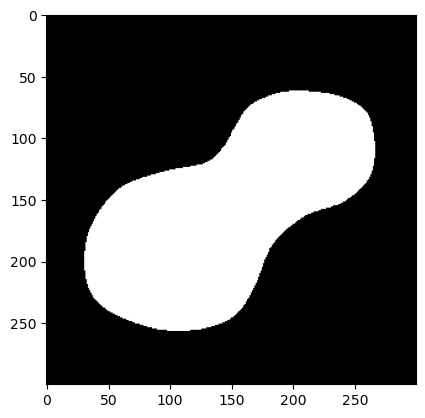

In [2]:
imagesDir = os.path.join("..\\..\\", "images", "Binary")
imagePath = os.path.join(imagesDir, "SingleObject1.png")
image     = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
rows, cols = (image.shape[0], image.shape[1])
print(imagePath, "\t\tImage shape:", image.shape)
plt.imshow(image, cmap=plt.cm.gray)

# Object Area
**Continous Form:** &emsp;&emsp; $ A=\iint_I b(x, y) d x d y $ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
**Discrete Form:** &emsp;&emsp; $ A=\sum_{i=1}^n \sum_{j=1}^M b_{i j} $

In [3]:
Area = 0
for y in range(rows):
    for x in range(cols):
        if image[y][x]:
            Area += 1
# OR    Area = np.sum(image) // 255
print("Object Area:", Area)

Object Area: 26157


# Object Centroid
**Continous Form:** &emsp;&emsp; $ \bar{x}=\frac{1}{A} \iint_I x b(x, y) d x d y \quad \bar{y}=\frac{1}{A} \iint_I y b(x, y) d x d y $ <br/><br/>
**Discrete Form:** &emsp;&emsp; $ \bar{x}=\frac{1}{A} \sum_{i=1}^n \sum_{j=1}^m i b_{i j} \quad \bar{y}=\frac{1}{A} \sum_{i=1}^n \sum_{j=1}^m j b_{i j} $


x_: 144 	 y_: 160


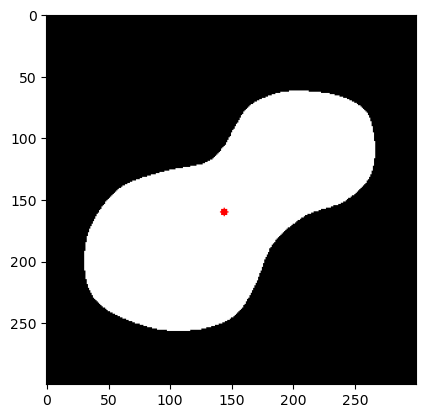

In [4]:
x_ = y_ = 0
for y in range(rows):
    for x in range(cols):
        if image[y][x]:
            x_   += x
            y_   += y
x_ //= Area
y_ //= Area 
print("x_:", x_, "\t y_:", y_)

# For sake of visualization converting image to 3D channel to see colors of points and lines
newImage = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 
newImage = cv2.circle(newImage, (x_, y_), radius=0, color=(255, 0, 0), thickness=5)
plt.imshow(newImage, cmap=plt.cm.gray)

# Object Orientation

We wanth to find the axis of orientation i.e. The axis which we need least effort to rotate the object around it. <br/><br/>
The Axis line equation should be: &emsp; $ y=m x+b  \quad\quad\quad\quad\quad\quad\quad \text { Where }-\infty \leq m \leq \infty $<br/>
Instead we will use: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ x \sin \theta-y \cos \theta+\rho=0 \quad\quad \text { Where } \rho, \ \theta \ are finite $

So we want to minimize the energy &emsp;&emsp; $ E = \iint_I r^2 b(x, y) d x d y $ &emsp;&emsp; Where r is the perpendicular distance of a point on the object to the axis is given by:
$$ r=\left|\frac{a x+b y+c}{\sqrt{a^2+b^2}}\right| \quad\quad \text { Or } \quad\quad\quad\quad 
r=\left|\frac{x \sin \theta-y \cos \theta+\rho}{\sqrt{\sin ^2 \theta+\cos ^2 \theta}}\right|  \quad\quad r=|x \sin \theta-y \cos \theta+\rho| $$

By substituting in $E$ we get: &emsp;&emsp; $E=\iint_I(x \sin \theta-y \cos \theta+\rho)^2 b(x, y) d x d y$<br/><br/>
So we want to find $\rho$, $\theta$ that minimize $E$ for a given $b(x, y)$ By using $ \frac{\partial E}{\partial \rho}=0 \quad $ we get: &emsp;&emsp; $ A(\bar{x} \sin \theta-\bar{y} \cos \theta+\rho)=0 $

To simplify $E$ we move the coordinates to the Centroid: &emsp; $ x^{\prime}=x-\bar{x}, \quad y^{\prime}=y-\bar{y} $ &emsp;&emsp; and we can rewrite $E$ as: &emsp; $ E=a \sin ^2 \theta-b \sin \theta \cos \theta+c \cos ^2 \theta  $
<br/><br/>Where &emsp;&emsp; $ a = \iint_{I^{\prime}}\left(x^{\prime}\right)^2 b(x, y) d x^{\prime} d y^{\prime} \quad\quad\quad
                     b = 2 \iint_{I^{\prime}}\left(x^{\prime} y^{\prime}\right) b(x, y) d x^{\prime} d y^{\prime} \quad\quad\quad
                    c = \iint_{I^{\prime}}\left(y^{\prime}\right)^2 b(x, y) d x^{\prime} d y^{\prime}$

**Discrete Form:** &emsp;&emsp; $ a = \sum_{i=1}^n \sum_{j=1}^m (i-\bar{x})^2 b_{i j} \quad 
                                  b = 2 \sum_{i=1}^n \sum_{j=1}^m (i-\bar{x}) (j-\bar{y}) b_{i j} \quad 
                                  c = \sum_{i=1}^n \sum_{j=1}^m (j-\bar{y})^2 b_{i j} $

In [5]:
a_ = b_ = c_ = 0
for y in range(rows):
    for x in range(cols):
        if image[y][x]:
            a_ += (x - x_) ** 2
            b_ += 2 * (x - x_) * (y - y_) 
            c_ += (y - y_) ** 2

By using $ \frac{d E}{d \theta}=0 \quad $ we get: &emsp;&emsp; $ \tan 2 \theta=\frac{b}{a-c} = \tan (2 \theta+\pi)=\frac{-b}{c-a} \quad\quad $ Where $\theta$ have 2 values for both $E_\text{min} \ \& \ E_\text{max}$

Using second derivative test:
<br/>If $\frac{d^2 E}{d \theta^2}=(a-c) \cos 2 \theta+b \sin 2 \theta\left\{\begin{array}{l}>0 \text { then Minimum } \\ <0 \text { then Maximum }\end{array}\right.$


In [6]:
theta1 = atan2( b_, a_-c_) / 2     # Note: Radian angle
theta2 = atan2(-b_, c_-a_) / 2
check1 = (a_ - c_) * cos(2*theta1) + b_ * sin(2*theta1)
check2 = (a_ - c_) * cos(2*theta2) + b_ * sin(2*theta2)
if check1 > 0:
    theta_Emin = theta1
    theta_Emax = theta2
else:
    theta_Emin = theta2
    theta_Emax = theta1
Emin = a_ * sin(theta_Emin)**2 - b_ * sin(theta_Emin) * cos(theta_Emin) - c_ * cos(theta_Emin)**2
Emax = a_ * sin(theta_Emax)**2 - b_ * sin(theta_Emax) * cos(theta_Emax) - c_ * cos(theta_Emax)**2
print("theta_Emin:", degrees(theta_Emin), "\t", "Emin:", Emin)
print("theta_Emax:", degrees(theta_Emax), "\t", "Emax:", Emax)

theta_Emin: -36.41698564398046 	 Emin: -55536282.80951053
theta_Emax: 53.58301435601954 	 Emax: 86536013.80951051


### Axis line equation

In [7]:
rho = y_ * cos(theta_Emin) - x_ * sin(theta_Emin)
m   = tan(theta_Emin)
b   = rho / cos(theta_Emin)
if degrees(theta_Emin) == 0.0:
    print("Axis line equation: y =", b)
elif degrees(theta_Emin) == 90.0:
    print("Axis line equation: x =", -b / m)
else:
    print("Axis line equation: y =", m, "x +", b)

Axis line equation: y = -0.7377212810799743 x + 266.2318644755163


### Draw Full line

(0, 266) (300, 44)


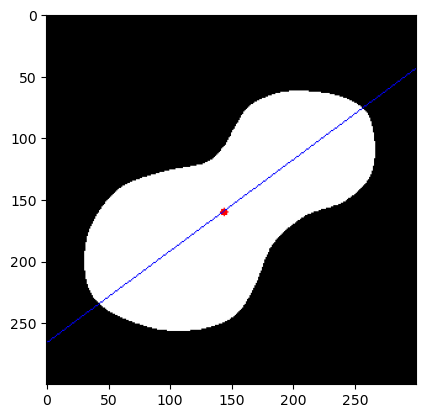

In [8]:
p1 = None
p2 = None
if degrees(theta_Emin) == 0.0:
    p1 = (0   , y_)
    p2 = (cols, y_)
elif degrees(theta_Emin) == 90.0:
    p1 = (x_, 0)
    p2 = (x_, rows)
else:
    y = b
    x = -b / m
    if y >= 0  and  y < rows:
        p1 = (0, int(y))
    else:
        p1 = (int(x), 0)

    y = m * cols + b
    x = (rows - b) / m
    if y >= 0  and  y < rows:
        p2 = (cols, int(y))
    else:
        p2 = (int(x), rows)
print(p1, p2)

newImage = cv2.line(newImage, p1, p2, color=(0, 0, 255), thickness=1)
plt.imshow(newImage, cmap=plt.cm.gray)